# Regresion Lineal Simple - Ejercicio 3

### Importe de librerias

In [2]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook: # maquina virtual colab
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR  = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR    = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '/content/drive/MyDrive/Colab Notebooks/MODELOS/'    # carpeta donde se encuentran los modelos
    ARCHIVOS_DIR = '/content/drive/MyDrive/Colab Notebooks/ARCHIVOS/'   # carpeta recuperar o copiar archivos
else: # maquina local ipython
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
    ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Consigna

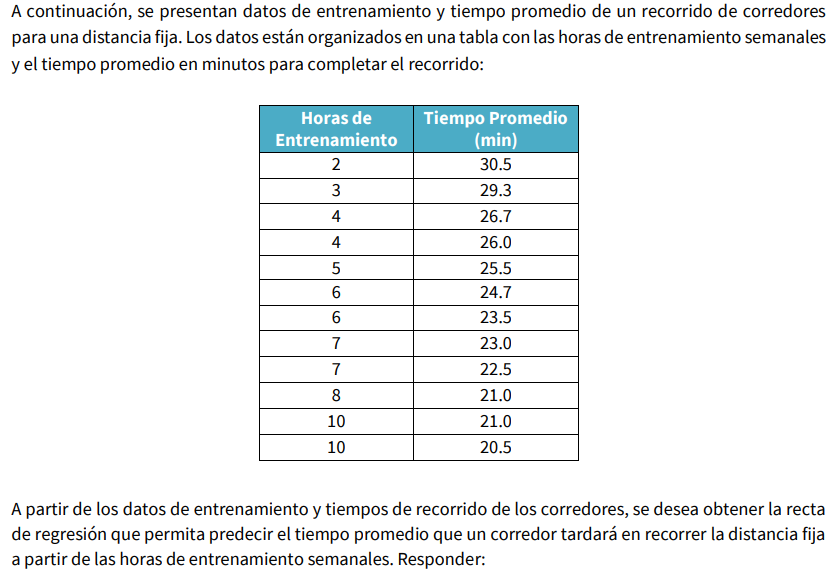

In [4]:
data = {
    'Horas_Entrenamiento': [2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10],
    'Tiempo_Promedio': [30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5, 21.0, 21.0, 20.5]
}

df = pd.DataFrame(data)

In [5]:
df

,Horas_Entrenamiento,Tiempo_Promedio
0,2,30.5
1,3,29.3
2,4,26.7
3,4,26.0
4,5,25.5
5,6,24.7
6,6,23.5
7,7,23.0
8,7,22.5
9,8,21.0


### Inciso a - Correlacion Lineal

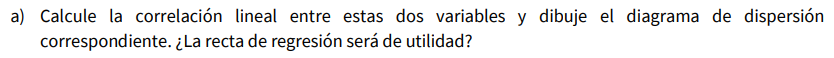

In [4]:
df.corr()

,Horas_Entrenamiento,Tiempo_Promedio
Horas_Entrenamiento,1.000000,-0.959746
Tiempo_Promedio,-0.959746,1.000000


DIAGRAMA DE DISPERSION

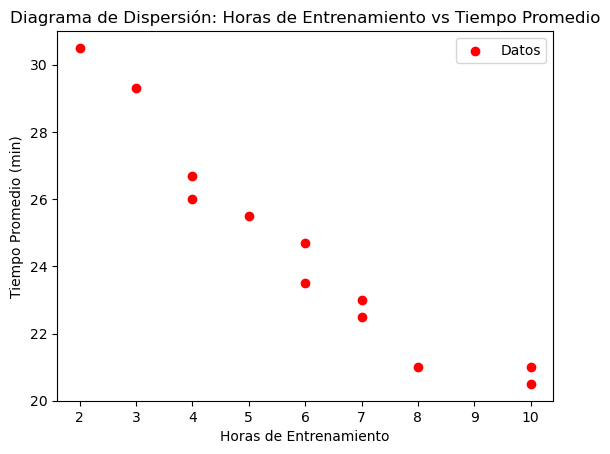

In [5]:
# diagrama de dispersion
plt.scatter(df['Horas_Entrenamiento'], df['Tiempo_Promedio'], color='red', label='Datos')

# etiquetas
plt.xlabel('Horas de Entrenamiento')
plt.ylabel('Tiempo Promedio (min)')

#titulo
plt.title('Diagrama de Dispersión: Horas de Entrenamiento vs Tiempo Promedio')

#le saco las grillas de atras
plt.grid(False)

#cuadrado que te marca el color de los puntos que significa
plt.legend()

# muestra el grafico
plt.show()

La recta de regresion si sera de utilidad ya que los datos estan linealmente correlacionados

### Inciso b - Descenso de gradiente - Combinador lineal - ECM

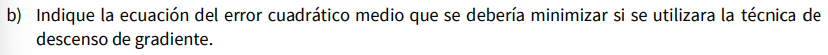

COMBINADOR LINEAL

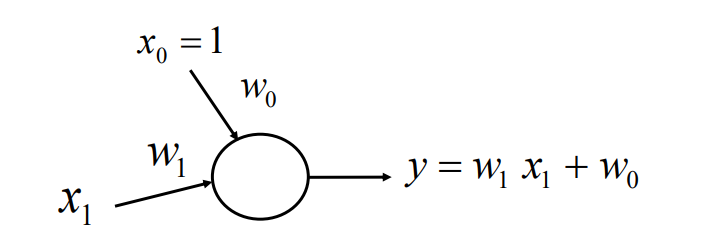

RECTA QUE SE BUSCA MINIMIZAR: se busca encontrar los valores de w0 y w1 que minimicen el error cuadratico medio

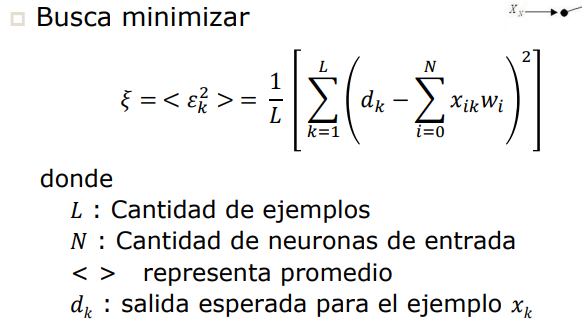

MINIMIZACION DE FUNCIONES USANDO EL GRADIENTE

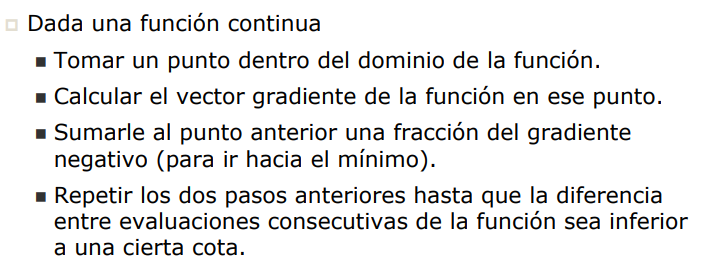

GRADIENTE

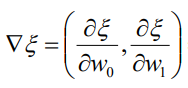

Descenso de gradiente: Calcula el gradiente usando todo el conjunto de datos para ajustar los pesos del modelo. Es más preciso en cada paso, pero puede ser costoso y lento para grandes conjuntos de datos, ya que debe calcularse el gradiente para todos los ejemplos antes de actualizar los pesos.

calcula el ECM en todos los casos, es mas lento pero mas preciso

### Inciso c - Descenso de gradiente estocastico

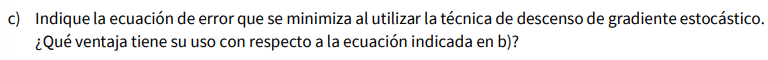

Descenso de gradiente estocástico (SGD): Calcula el gradiente usando un solo ejemplo de entrenamiento en cada iteración, lo que hace que las actualizaciones sean más rápidas y frecuentes. Aunque es más rápido, introduce ruido en las actualizaciones, lo que puede hacer que los saltos en el espacio de búsqueda sean menos predecibles.

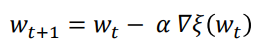

ERROR CUADRATICO MEDIO

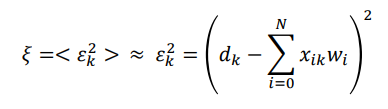

ENTRENAMIENTO DEL COMBINADOR LINEAL

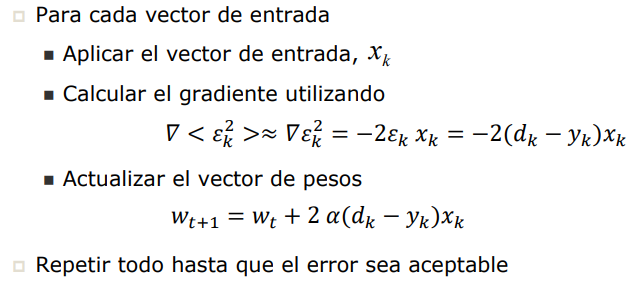

No es muy preciso pero es mas rapido

### Inciso d - Neurona Lineal - Descenso de gradiente estocastico

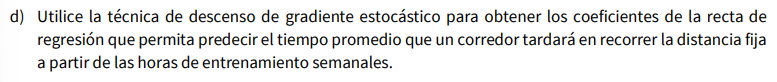

In [7]:
from ClassNeuronaLineal import NeuronaLineal

La implementación de la clase NeuronaLineal en el método fit utiliza la técnica de descenso de gradiente estocástico (SGD). Esto se debe a que el ajuste de los pesos y el sesgo se realiza utilizando un solo ejemplo de entrenamiento a la vez dentro del bucle for xi, target in zip(X, y). Cada vez que se pasa por un ejemplo (xi), se calcula el error, se ajustan los pesos y el sesgo, y luego se pasa al siguiente ejemplo, lo que es característico del descenso de gradiente estocástico.

for xi, target in zip(X, y):

- Este bucle itera sobre cada ejemplo individual (xi) y su etiqueta (target). Dentro de este bucle, se calcula el error y se actualizan los pesos y el sesgo en cada iteración

 las actualizaciones de los pesos (self.w_) y el sesgo (self.b_) se realizan de forma individual para cada muestra de entrenamiento
 
- errorXi = (target - self.predict(xi))
- update = self.alpha * errorXi
- self.w_ += update * xi
- self.b_ += update


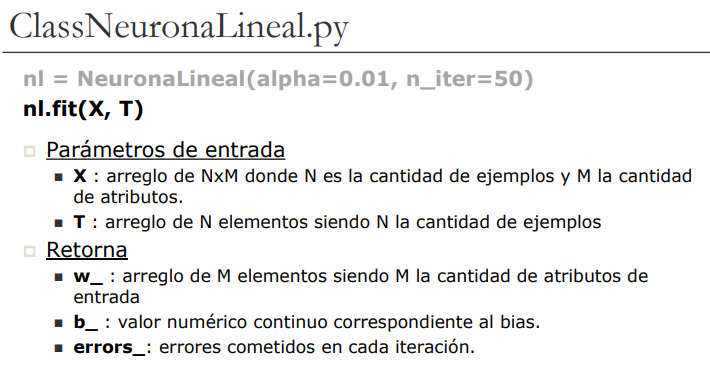

SOLUCION CON USO DE LA IMPLEMENTACION DE LA NEURONA LINEAL

In [10]:
X = np.array([2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10]) # horas de entrenamiento semanal
Y = np.array([30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5, 21.0, 21.0, 20.5]) # tiempo promedio del recorrido

#los declaro como array ya que la neurona recibe como parametro de entrada un arreglo de N*M

In [12]:
x_train = X.reshape(-1,1)    # selecciona entradas y formatea a Nx1
y_train = Y.reshape(-1,1)    # selecciona salidas y formatea a Nx1
print(x_train.shape)

(12, 1)


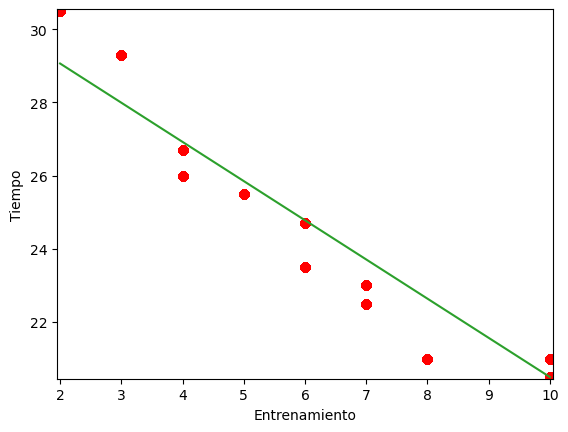

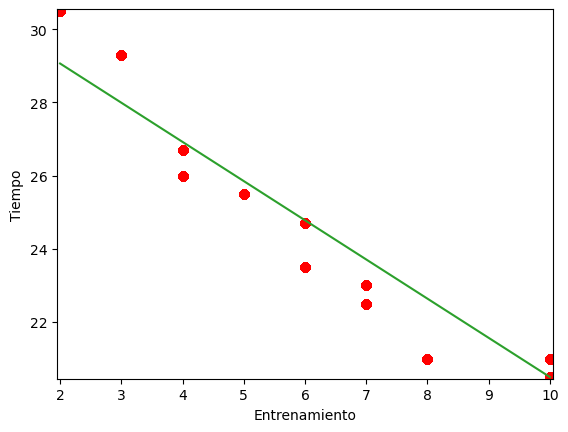

In [13]:
# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.01, n_iter=500, cotaE=0.001, draw=1, title=['Entrenamiento', 'Tiempo'])
modelo = modelo.fit(x_train, y_train)

PESOS FINALES

In [14]:
# imprime pesos
print('Pesos de la Neurona:')
print('  w =', modelo.w_[0])
print('  b =', modelo.b_[0])

Pesos de la Neurona:
  w = -1.0711392443732064
  b = 31.206162617699572


ERRORES POR ITERACION

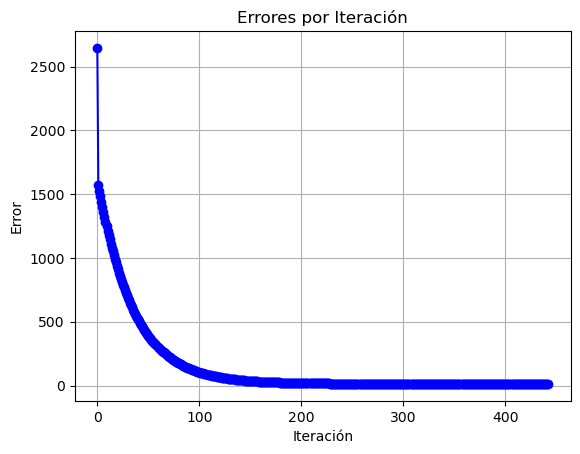

In [15]:
# grafica errores
plt.plot(range(len(modelo.errors_)), [err[0] for err in modelo.errors_], marker='o', linestyle='-', color='b')
plt.title('Errores por Iteración')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True)
plt.show()

### PInciso e - Prediccion

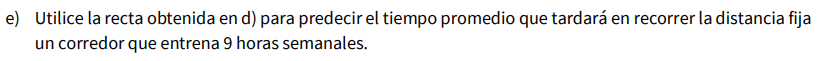

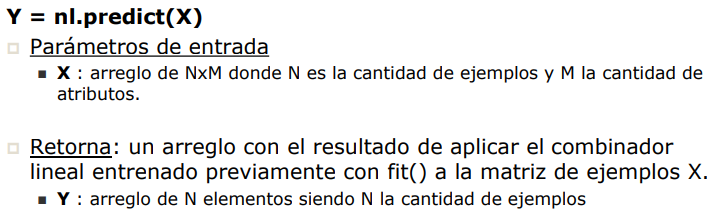

In [15]:
horas = 9 # horas semanales dedicadas
tiempo = modelo.predict([horas]) # prediccion del tiempo de recorrido en minutos

print('Quien dedicó %d horas de entrenamiento tradará %d minutos en hacer el recorrido\n' % (horas, tiempo[0]))


Quien dedicó 9 horas de entrenamiento tradará 21 minutos en hacer el recorrido

